Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


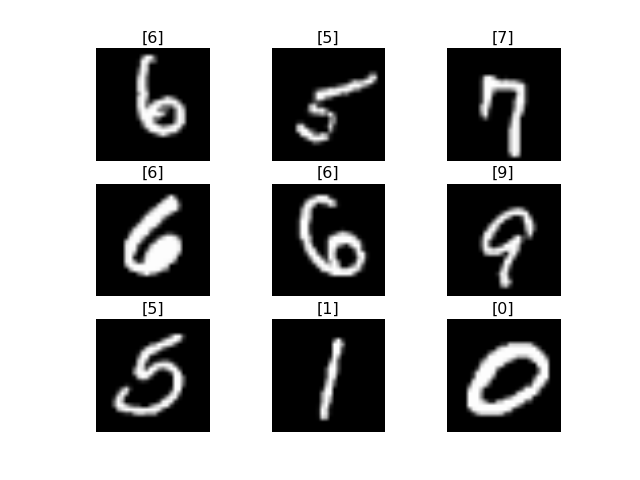

In [4]:
# 3 Read the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

%matplotlib notebook
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy.random import choice
import numpy as np
from itertools import count


#mnist.test.images[0]
labels = np.arange(0,10)


# 4 Investigate the data
plt.ioff()
fig = plt.figure('MNIST Data')
for i, sample in enumerate(choice(len(mnist.train.images), 9, replace=False)):
    sbplt = plt.subplot(331+i)
    sbplt.axis('off')
    sbplt.set_title(labels[mnist.train.labels[sample]==1])
    sbplt.imshow(np.reshape(mnist.train.images[sample],(28,28)), cmap='gray')
fig.canvas.draw()
plt.show()


<IPython.core.display.Javascript object>


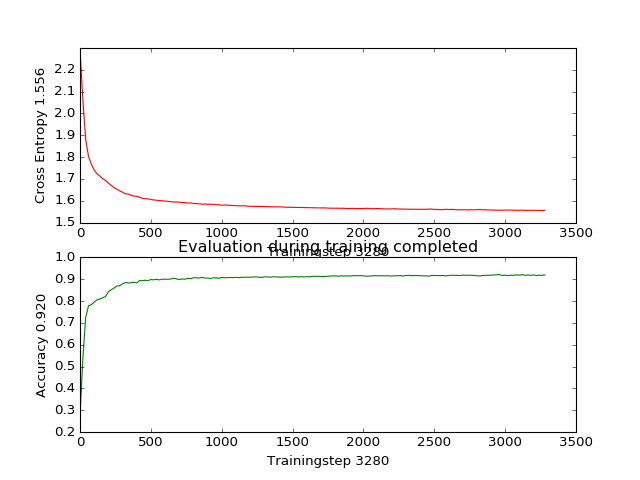

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
## Implement the DFG

x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.ones([784, 10])*tf.distributions.Normal(loc=0.5,scale=0.000002).sample([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])


# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# First, tf.log computes the logarithm of each element of y.aru
# Next, we multiply each element of y_ with the corresponding element of tf.log(y).
# Then tf.reduce_sum adds the elements in the second dimension of y, due to the reduction_indices=[1] parameter. 
# Finally, tf.reduce_mean computes the mean over all the examples in the batch.

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# minimize cross_entropy using the gradient descent algorithm with a learning rate of 0.5.

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Plot initialization
plt.ion()
figs, (ax1, ax2) = plt.subplots(2,1)
plt.title("Evaluation during training...")
c_e = []
acc = []


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
for iteration in count():
        batch_xs, batch_ys = mnist.train.next_batch(50)  # trainging with random mini batches
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        # train for 3 epochs
        if mnist.train.epochs_completed >= 3:
            break
        ## Evaluation
        if iteration % 20 == 0:
            plt.sca(ax1)
            ax1.cla()
            #ax1.axis([0, iteration, 0, 1])
            plt.sca(ax2)
            ax2.cla()
            #ax2.axis([0, iteration, 0, 1])

            val_acc, val_cross_ent = sess.run([accuracy, cross_entropy], feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})
    
            c_e.append(val_cross_ent)
            acc.append(val_acc)
            ax1.plot(range(0,iteration+1, 20), c_e, 'r-')
            ax1.set_ylabel('Cross Entropy {:1.3f}'.format(c_e[-1]))
            ax1.set_xlabel('Trainingstep {:d}'.format(iteration))

            ax2.plot(range(0,iteration+1, 20), acc, 'g-')
            ax2.set_ylabel(('Accuracy {:1.3f}'.format(acc[-1])))
            ax2.set_xlabel('Trainingstep {:d}'.format(iteration))

            fig.canvas.draw()
                           
plt.ioff()
plt.title('Evaluation during training completed')
plt.show()